### Persistent homology examples

* Ripser [paper](https://www.theoj.org/joss-papers/joss.00925/10.21105.joss.00925.pdf) [code](https://github.com/scikit-tda/ripser.py) (fast)
* Dionysus 2 [code](https://mrzv.org/software/dionysus2/) (representative examples)
* Nico's [code](https://github.com/nhchristianson/Math-text-semantic-networks)
* Ann's [code](https://github.com/asizemore/PH_tutorial/blob/master/Tutorial_day1.ipynb)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '..', 'module'))

### Try persistent homology

In [3]:
import wiki

# topic = 'biochemistry'
topic = 'physics'
path_saved = '/Users/harangju/Box Sync/Research/my papers/wikipedia paper/data/graphs/full/'
network = wiki.Net()
network.load_graph(path_saved + topic + '.gexf')

In [10]:
%time network.barcodes

CPU times: user 14 µs, sys: 1 µs, total: 15 µs
Wall time: 16.9 µs


,dim,birth,death,birth simplex,death simplex,birth nodes,death nodes
0,0,-6000,inf,[Mirror],[],[Mirror],[]
1,0,-6000,-6000.0,[Autocollimator],"[Mirror, Autocollimator]",[Autocollimator],"[Mirror, Autocollimator]"
2,0,-4000,-700.0,[Condensed matter physics],"[Optics, Mirror]",[Condensed matter physics],[Optics]
3,0,-4000,-4000.0,[Biexciton],"[Condensed matter physics, Biexciton]",[Biexciton],"[Condensed matter physics, Biexciton]"
4,0,-4000,-4000.0,[Condensed matter],"[Condensed matter physics, Condensed matter]",[Condensed matter],"[Condensed matter physics, Condensed matter]"
...,...,...,...,...,...,...,...
62638,7,2006,2006.0,"[Proton, Hadron, Antiparticle, Baryon, Up quar...","[Neutron, Proton, Hadron, Antiparticle, Baryon...",[Baryon],[Baryon]
62639,7,2006,2006.0,"[Proton, Electric charge, Antiparticle, Up qua...","[Neutron, Proton, Electric charge, Antiparticl...",[Antineutron],[Antineutron]
62640,7,2006,2006.0,"[Proton, Antiparticle, Meson, Baryon, Strong i...","[Neutron, Proton, Antiparticle, Meson, Baryon,...","[Baryon, List of baryons]","[Baryon, List of baryons]"
62641,7,2006,2006.0,"[Particle physics, Hadron, Antiparticle, Meson...","[Proton, Particle physics, Hadron, Antiparticl...","[Baryon, List of baryons]","[Baryon, List of baryons]"


In [33]:
network.save_barcodes(path_saved + topic + '.p')

In [34]:
network.load_barcodes(path_saved + topic + '.p')

### Plot

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd

sns.set(style='whitegrid', font_scale=1.6)

In [35]:
def plot_barcodes(barcodes):
    """
    """
    colors = [mcd.XKCD_COLORS['xkcd:'+c]
          for c in ['emerald green', 'tealish', 'peacock blue', 
                    'grey', 'brown', 'red', 'yellow']]
    plt.figure(figsize=(15,6))
    for i, row in barcodes.iterrows():
        sys.stdout.write('\rPlotting barcode {}/{}'.\
                         format(str(i),len(barcodes)))
        sys.stdout.flush()
        birth = row['birth']
        death = row['death']
        x = [birth, 2050] if death==np.inf else\
            [birth, death]
        plt.plot(x, i*np.ones(len(x)), colors[row['dim']])
        if death != np.inf:
            plt.plot(death, i, 'r.')
    plt.axvline(x=2040, linestyle='--', color=mcd.XKCD_COLORS['xkcd:grey'])
    plt.gca().axes.yaxis.set_ticklabels([])

In [13]:
def plot_persistence_diagram(barcodes):
    colors = [mcd.XKCD_COLORS['xkcd:'+c]
      for c in ['emerald green', 'tealish', 'peacock blue', 
                'grey', 'brown', 'red', 'yellow']]
    plt.figure(figsize=(10,10))
    for dim in set(barcodes['dim']):
        data = barcodes.loc[barcodes['dim']==dim]
        data.loc[data['death']==np.inf,'death'] = 2030
        plt.plot(data['birth'], data['death'], '.')
    x = [barcodes['birth'].min(),
         barcodes.loc[barcodes['death']!=np.inf,'death'].max()]
    print(x)
    plt.plot(x, [2030, 2030], '--')

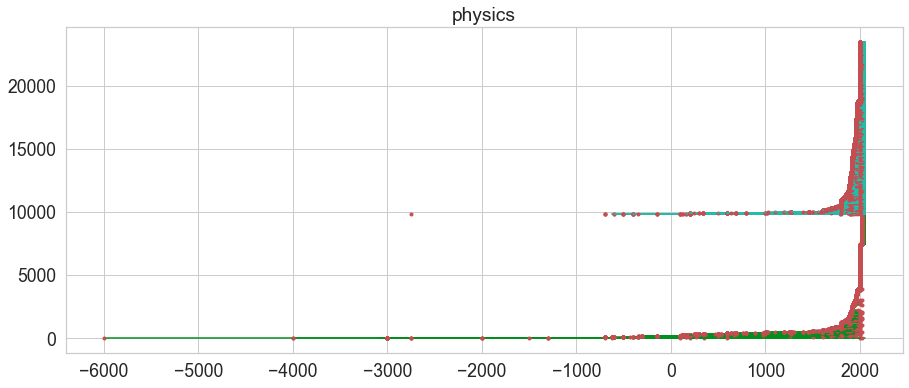

In [14]:
%time plot_barcodes(network.barcodes)
plt.title(topic)
# %time plot_persistence_diagram(barcodes.loc[barcodes['birth']>1900])

### Barcode statistics

In [15]:
births = {n: [0]*max(network.barcodes['dim']) for n in sorted(network.nodes)}
deaths = {n: [0]*max(network.barcodes['dim']) for n in sorted(network.nodes)}
for row in network.barcodes.iterrows():
    birth_nodes = row[1]['birth nodes']
    death_nodes = row[1]['death nodes']
    for node in birth_nodes:
        births[node][row[1]['dim']-1] += 1
    for node in death_nodes:
        deaths[node][row[1]['dim']-1] += 1

In [16]:
counts = {'names': list(range(len(network.nodes)))*2,
          'type': ['births']*len(network.nodes) + ['deaths']*len(network.nodes),
          'value': [sum(births[n]) for n in network.nodes] +\
                   [sum(deaths[n]) for n in network.nodes]}

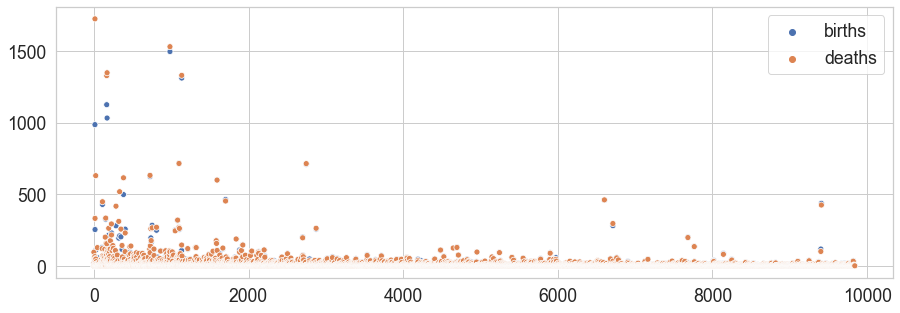

In [17]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='names', y='value', hue='type', data=counts)

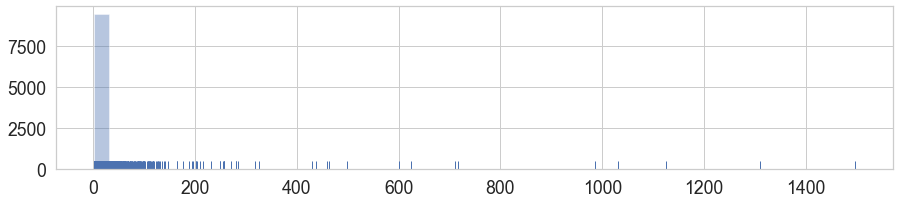

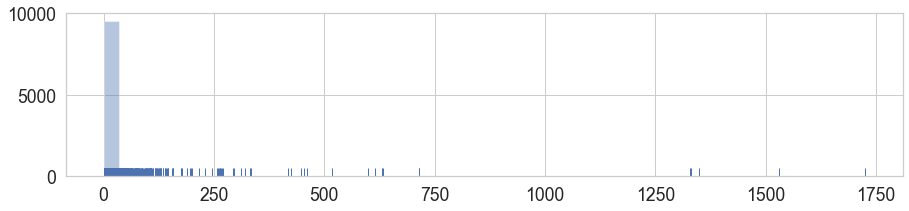

In [18]:
plt.figure(figsize=(15,3))
sns.distplot([sum(x) for x in births.values()], kde=False, rug=True)
plt.figure(figsize=(15,3))
sns.distplot([sum(x) for x in deaths.values()], kde=False, rug=True)

Text(0, 0.5, 'P(number of cavities)')

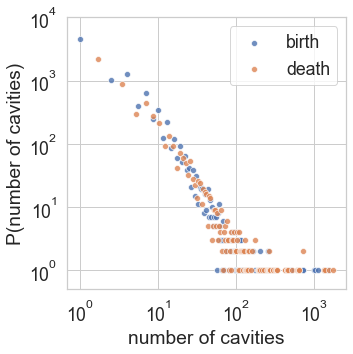

In [24]:
fig = plt.figure(figsize=(5,5))
hist, edges = np.histogram([sum(x) for x in births.values()], 1000)
ax = sns.scatterplot('x', 'y', data={'x': edges[:-1],
                                     'y': hist}, alpha=0.8)
hist, edges = np.histogram([sum(x) for x in deaths.values()], 1000)
sns.scatterplot('x', 'y', data={'x': edges[:-1],
                                'y': hist}, alpha=0.8)
ax.set_yscale('log')
ax.set_ylim([.5,10000])
ax.set_xscale('log')
ax.set_ylim([.5,10000])
ax.legend(['birth', 'death'])
ax.set_xlabel('number of cavities')
ax.set_ylabel('P(number of cavities)')

In [25]:
[n for n, o in births.items() if sum(o)>400]

['Baryon',
 'Charm quark',
 'Elementary particle',
 'Fermion',
 'Hadron',
 'Light',
 'List of baryons',
 'List of mesons',
 'Matter',
 'Neutron',
 'Nucleon',
 'Standard model',
 'Strong interaction',
 'Timeline of particle discoveries']

In [26]:
[n for n, o in deaths.items() if sum(o)>400]

['Baryon',
 'Charm quark',
 'Elementary particle',
 'Fermion',
 'Fluid dynamics',
 'Hadron',
 'Light',
 'List of baryons',
 'List of mesons',
 'Matter',
 'Neutron',
 'Nucleon',
 'Standard model',
 'Star',
 'Strong interaction',
 'Sun',
 'Timeline of particle discoveries']

In [30]:
[n for n in network.graph.nodes if len(network.graph[n])>200]

['General relativity',
 'Particle physics',
 'Quantum mechanics',
 'Physics',
 'Energy',
 'Magnetic field',
 'Electron',
 'Temperature']

Text(0, 0.5, 'P(lifetime)')

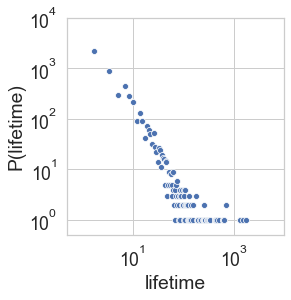

In [32]:
lifetimes = np.array(network.barcodes['death']-network.barcodes['birth'])
lifetimes[lifetimes >= 1E308] = 0
hist, edges = np.histogram([sum(lifetimes)
                            for lifetimes in deaths.values()], 1000)
ax = sns.scatterplot('x', 'y', data={'x': edges[:-1],
                                     'y': hist})
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(.5,10000)
ax.set_ylim(.5,10000)
ax.set_aspect('equal', 'box')
ax.set_xlabel('lifetime')
ax.set_ylabel('P(lifetime)')